In [32]:
from scipy.io import wavfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display

from sklearn.model_selection import train_test_split

In [2]:
sim_samplerate, sim_data = wavfile.read(filename="samples/sim/sim_music_01.wav", mmap=False)
act_samplerate, act_data = wavfile.read(filename="samples/actual/act_music_01.wav", mmap=False)

sim_length = sim_data.shape[0]/sim_samplerate
act_length = act_data.shape[0]/act_samplerate

print(f"Simulation samplerate: {sim_samplerate}")
print(f"Simulation time length: {sim_length}s")
print(f"Simulation data points: {sim_data.shape[0]}")
print("-------------------------------")
print(f"Actual samplerate: {act_samplerate}")
print(f"Actual time length: {act_length}s")
print(f"Actual data points: {act_data.shape[0]}")

Simulation samplerate: 44100
Simulation time length: 14.567800453514739s
Simulation data points: 642440
-------------------------------
Actual samplerate: 44100
Actual time length: 14.567800453514739s
Actual data points: 642440


In [3]:
# Print the textual data to file for human comparison
# np.savetxt("samples/sim/sim_data_text.txt", sim_data, delimiter=',', newline="\n")
# np.savetxt("samples/actual/act_data_text.txt", act_data, delimiter=',', newline="\n")
# print("Saved textual samples to samples directory.")

Saved textual samples to samples directory.


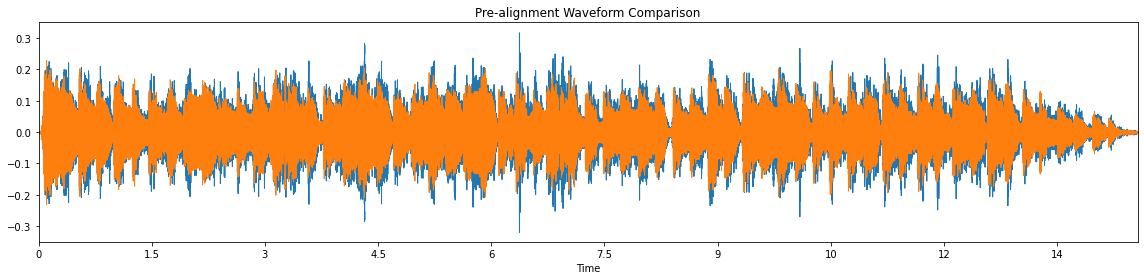

In [3]:
sim_rosa, fs = librosa.load('samples/sim/sim_music_01.wav')
act_rosa, fs = librosa.load('samples/actual/act_music_01.wav')

plt.figure(figsize=(16, 4))
librosa.display.waveplot(sim_rosa, sr=fs)
librosa.display.waveplot(act_rosa, sr=fs)

plt.title('Pre-alignment Waveform Comparison')
plt.tight_layout()

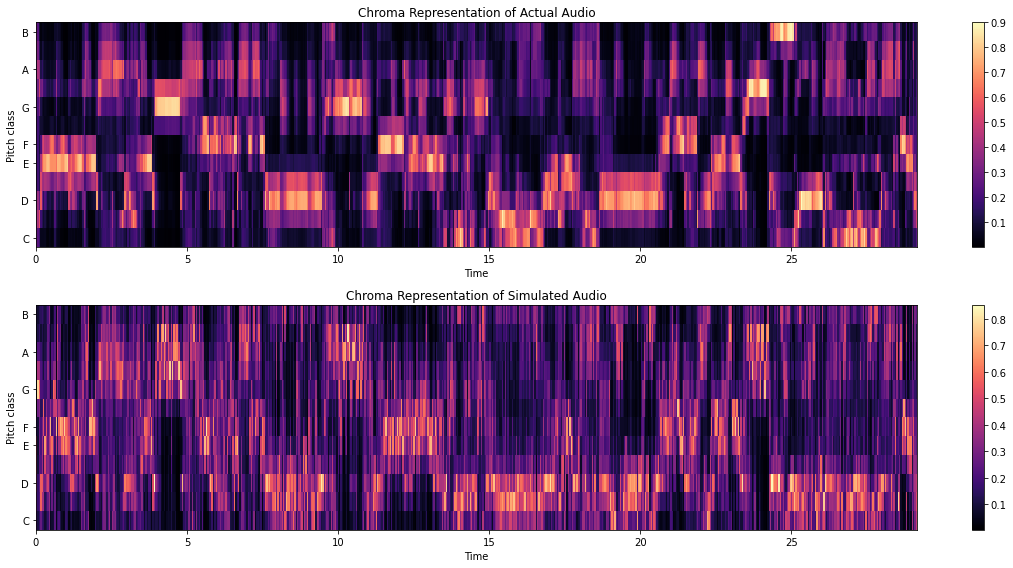

In [10]:
hop_size = 1024

sim_chroma = librosa.feature.chroma_stft(y=sim_rosa, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size)
act_chroma = librosa.feature.chroma_stft(y=act_rosa, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size)

plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.title('Chroma Representation of Actual Audio')
librosa.display.specshow(act_chroma, x_axis='time',
                         y_axis='chroma', hop_length=hop_size)
plt.colorbar()


plt.subplot(2, 1, 2)
plt.title('Chroma Representation of Simulated Audio')
librosa.display.specshow(sim_chroma, x_axis='time',
                         y_axis='chroma', hop_length=hop_size)

plt.colorbar()
plt.tight_layout()

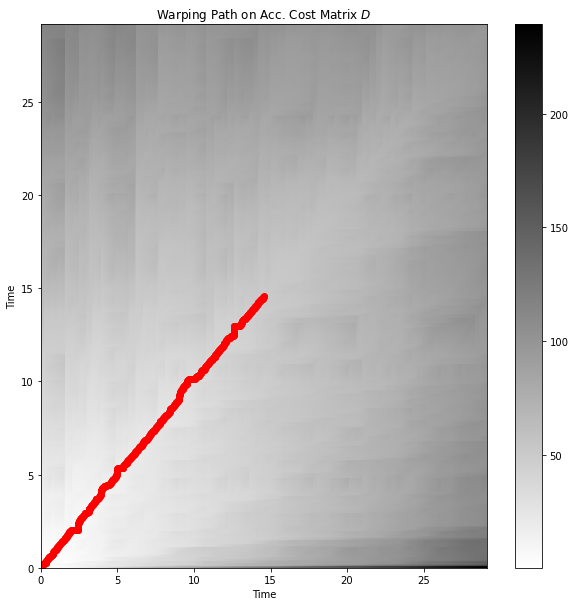

In [11]:
D, wp = librosa.sequence.dtw(X=sim_chroma, Y=act_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

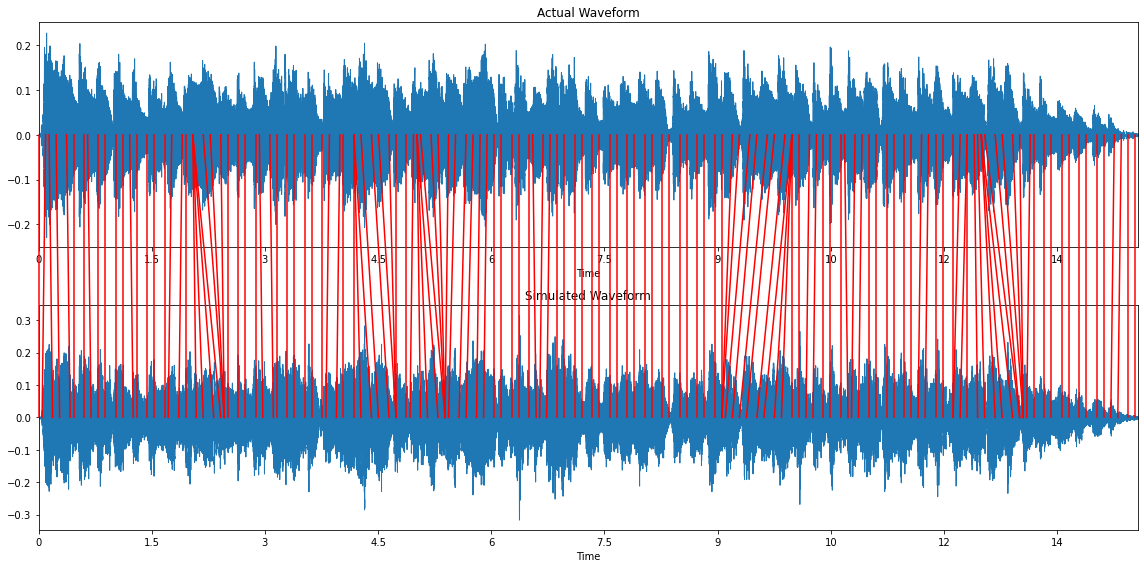

In [ ]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(act_rosa, sr=fs)
plt.title('Actual Waveform')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(sim_rosa, sr=fs)
plt.title('Simulated Waveform')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 150
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))
samples_dataset = np.zeros((2, arrows))
dset_incr = 0
# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))
    
    #samples_dataset[0, dset_incr] = wp[points_idx]
    #samples_dataset[1, dset_incr] = wp[points_idx]

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)
    dset_incr += 1


fig.lines = lines
plt.tight_layout()

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(wp[])
print(samples_dataset[0][5:10])
print(samples_dataset[1][5:10])

[14.34993197 14.34993197 14.34993197 14.30349206 14.25705215]
[14.34993197 14.34993197 14.30349206 14.25705215 14.21061224]
